## Rail transport performance in Europe in 2021

In [71]:
import pandas as pd

In [72]:
df = pd.read_csv('datasets/Rail_transport_performance_in_Europe_2021.csv')

In [73]:
df

,country_larger_city,HDC_code_larger,larger_city,pop_larger_city,country_smaller_city,HDC_code_smaller,smaller_city,pop_smaller_city,crossborder,distance_centroids,av_dist_opti,time_opti,speed_opti,av_dist_avt,time_avt,speed_avt
0,FR,GEOSTAT11_450,Paris,8900172,BE,GEOSTAT11_349,Bruxelles / Brussel,1233487,True,more than 120 km,260.8,1.44,182.1,261.6,1.71,153.5
1,FR,GEOSTAT11_450,Paris,8900172,FR,GEOSTAT11_361,Lille,911478,False,more than 120 km,202.0,1.00,202.1,201.9,1.29,157.3
2,FR,GEOSTAT11_450,Paris,8900172,FR,GEOSTAT11_418,Rouen,298297,False,114.6,110.0,1.24,88.7,110.0,1.67,65.9
3,FR,GEOSTAT11_450,Paris,8900172,FR,GEOSTAT11_434,Cergy-Pontoise,273138,False,30.6,4.8,0.07,67.9,4.8,0.17,27.9
4,FR,GEOSTAT11_450,Paris,8900172,FR,GEOSTAT11_499,Tours,211915,False,more than 120 km,187.7,0.86,218.2,200.4,1.54,130.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,HU,GEOSTAT11_506,Szolnok,51457,HU,GEOSTAT11_500,Érd,51285,False,99.6,NaN,NaN,NaN,NaN,NaN,NaN
6595,HU,GEOSTAT11_500,Érd,51285,HU,GEOSTAT11_516,Veszprém,50141,False,82.2,NaN,NaN,NaN,NaN,NaN,NaN
6596,IT,GEOSTAT11_770,Bitonto,50961,IT,GEOSTAT11_734,Manfredonia,50684,False,86.8,NaN,NaN,NaN,NaN,NaN,NaN
6597,IT,GEOSTAT11_770,Bitonto,50961,IT,GEOSTAT11_761,Cerignola,50074,False,68.5,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df['country_larger_city'].value_counts()

UK    2336
NL    1037
DE    1025
ES     496
IT     487
PL     301
FR     287
BE     184
RO      91
CZ      75
CH      68
HU      43
BG      42
SE      30
SK      24
PT      20
AT      16
DK       7
SI       7
LT       5
IE       4
EL       4
FI       3
HR       3
LU       3
NO       1
Name: country_larger_city, dtype: int64

<Axes: >

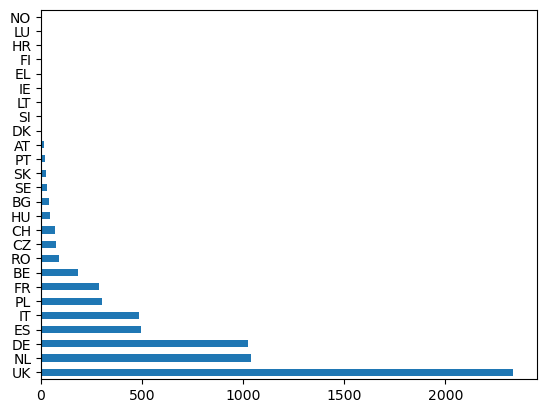

In [75]:
df['country_larger_city'].value_counts().plot(kind='barh')

In [76]:
df['country_smaller_city'].value_counts()

UK    2335
NL    1066
DE     982
ES     490
IT     481
FR     280
PL     271
BE     204
CZ     104
RO      92
CH      63
HU      55
BG      36
SK      31
SE      30
PT      22
AT      17
DK       7
EL       5
MC       5
IE       4
SI       4
HR       4
FI       3
LT       3
LU       3
NO       1
LV       1
Name: country_smaller_city, dtype: int64

In [77]:
df['time_opti'].describe()

count    3434.000000
mean        0.948771
std         0.399241
min         0.030000
25%         0.660000
50%         1.020000
75%         1.290000
max         1.500000
Name: time_opti, dtype: float64

In [78]:
df['time_avt'].describe()

count    3434.000000
mean        1.563730
std         1.265469
min         0.100000
25%         1.050000
50%         1.500000
75%         1.840000
max        17.600000
Name: time_avt, dtype: float64

## SNCF API source

Try to download SNCF source schedules for train connections  (les horraires)

In [19]:
import requests

api_key1 = "0dca33cf-7a3b-4c16-9baf-534bbdaf98b6"
api_key2 = "e86651c5-6924-48f0-b872-95ea08560ffe"

sncf_params = {
    "token": "e86651c5-6924-48f0-b872-95ea08560ffe"
}

In [31]:
sncf_req = requests.get(f"https://{api_key2}@api.sncf.com/v1/")
sncf_req.json()

{'links': [{'href': 'https://api.sncf.com/v1/coverage/',
   'templated': False,
   'rel': 'coverage',
   'type': 'coverage',
   'title': 'Coverage of navitia'},
  {'href': 'https://api.sncf.com/v1/coord/0.0%3B0.0/',
   'templated': True,
   'rel': 'coord',
   'type': 'coord',
   'title': 'Inverted geocoding for a given coordinate'},
  {'href': 'https://api.sncf.com/v1/journeys',
   'templated': False,
   'rel': 'journeys',
   'type': 'journeys',
   'title': 'Compute journeys'},
  {'href': 'https://api.sncf.com/v1/places',
   'templated': False,
   'rel': 'places',
   'type': 'places',
   'title': 'Autocomplete api'}]}

In [69]:
req_get = requests.get("https://apis.deutschebahn.com/db-api-marketplace/apis/timetables/v1/plan/")
req_get.json()

# !pip install interrail

{'httpCode': '404',
 'httpMessage': 'Not Found',
 'moreInformation': 'No resources match requested URI'}

### Getting distance table for trains

In [117]:
tmpDF = df[["larger_city","smaller_city","time_avt","time_opti"]].copy()
tmpDF.head()

,larger_city,smaller_city,time_avt,time_opti
0,Paris,Bruxelles / Brussel,1.71,1.44
1,Paris,Lille,1.29,1.00
2,Paris,Rouen,1.67,1.24
3,Paris,Cergy-Pontoise,0.17,0.07
4,Paris,Tours,1.54,0.86


Cleaning

In [118]:
tmpDF.dropna(inplace=True)

tmpDF["time_opti[min]"] = tmpDF["time_opti"] * 60
tmpDF["time_avg[min]"] = tmpDF["time_avt"]* 60

routes = tmpDF.rename(columns={"larger_city":"city_1",
                       "smaller_city":"city_2",
                       "time_opti":"time_opti[h]",
                       "time_avt":"time_avg[h]"})

routes

,city_1,city_2,time_avg[h],time_opti[h],time_opti[min],time_avg[min]
0,Paris,Bruxelles / Brussel,1.71,1.44,86.4,102.6
1,Paris,Lille,1.29,1.00,60.0,77.4
2,Paris,Rouen,1.67,1.24,74.4,100.2
3,Paris,Cergy-Pontoise,0.17,0.07,4.2,10.2
4,Paris,Tours,1.54,0.86,51.6,92.4
...,...,...,...,...,...,...
6575,Trani,Manfredonia,3.88,1.13,67.8,232.8
6582,Kettering,Corby,0.83,0.14,8.4,49.8
6584,San Severo,Bisceglie,2.69,1.10,66.0,161.4
6585,San Severo,Manfredonia,4.26,0.85,51.0,255.6


Issue: Double names

In [121]:
names1 = routes.loc[ routes["city_1"].str.contains("/")]["city_1"].unique()
names2 = routes.loc[ routes["city_2"].str.contains("/")]["city_2"].unique()

double_names = set(names2).union(set(names1))
pd.DataFrame(double_names).to_csv("./datasets/double_names_list.csv")
double_names

{'Aldwick / Felpham',
 'Alicante/Alacant',
 'Anzio / Nettuno',
 'Arcozelo / Espinho',
 'Ayr / Prestwick',
 'Bad Soden am Taunus / Kelkheim',
 'Beverwijk/Heemskerk',
 'Biel/Bienne',
 'Blantyre / Hamilton',
 'Bruxelles / Brussel',
 'Cannock / Hednesford',
 'Castellón de la Plana/Castelló de la Plana',
 'Chomutov / Jirkov',
 'Elche/Elx',
 'Frimley / Farnborough',
 'Gevelsberg / Schwelm',
 'Greve / Ishøj',
 'Grimsby / Cleethorpes',
 'Gröpelingen / Vegesack',
 'Kapellen / Ekeren',
 'Leeds / Bradford',
 'Lørenskog / Lillestrøm',
 'Mannheim/Ludwigshafen',
 'Martigues / Port-de-Bouc',
 'Maurepas / Montigny-le-Bretonneux',
 'Moers / Rheinhausen',
 'Motherwell / Wishaw',
 'Pamplona/Iruña',
 'Pozzuoli / Bacoli',
 'Quaregnon / Frameries',
 'Redhill / Reigate',
 'San Sebastián/Donostia',
 'Sant Cugat del Vallès/Rubí',
 'Soest / Baarn',
 'Solingen / Wuppertal',
 'Swords / Malahide',
 'Tampere / Tammerfors',
 'Ulm/Neu-Ulm',
 'Vaihingen / Möhringen',
 'Verviers / Dison',
 'Vitoria/Gasteiz',
 'Vleuten 

So far "double names" issue is an issue for limmited amount of cities. Most of them are small cities which have no direct access to airport. Therefore only "left" name will be taken as it represent the bigger one of cities or its international name

In [123]:
routes["city_1"] = routes["city_1"].apply(lambda x: x.split(" /")[0].strip())
routes["city_2"] = routes["city_2"].apply(lambda x: x.split(" /")[0].strip())
routes

,city_1,city_2,time_avg[h],time_opti[h],time_opti[min],time_avg[min]
0,Paris,Bruxelles,1.71,1.44,86.4,102.6
1,Paris,Lille,1.29,1.00,60.0,77.4
2,Paris,Rouen,1.67,1.24,74.4,100.2
3,Paris,Cergy-Pontoise,0.17,0.07,4.2,10.2
4,Paris,Tours,1.54,0.86,51.6,92.4
...,...,...,...,...,...,...
6575,Trani,Manfredonia,3.88,1.13,67.8,232.8
6582,Kettering,Corby,0.83,0.14,8.4,49.8
6584,San Severo,Bisceglie,2.69,1.10,66.0,161.4
6585,San Severo,Manfredonia,4.26,0.85,51.0,255.6


Save:
- train_cities.csv
- train_routes.csv

In [126]:
cities_set = set(routes["city_1"].unique()).union(routes["city_2"].unique())
train_cities = pd.DataFrame(cities_set)
train_cities.to_csv("./datasets/train_cities.csv",index=False, header=False)